In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [7]:
print(tf.__version__)

2.16.1


# Autoencoder

In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        img = img.convert('L')  # Ensure the image is in gray format
        img = img.resize((128, 128))  # Resize image to a fixed size
        img_array = np.array(img)
        images.append(img_array)
    return np.array(images)


# Paths to the image directories
xpath = './allblackwhite/'
ypath = './pymatting_outcome_rw'

# Load images
x_images = load_images_from_folder(xpath)
y_images = load_images_from_folder(ypath)

# Normalize the images
x_images = x_images.astype('float32') / 255.0
y_images = y_images.astype('float32') / 255.0

# Shuffle and split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_images, y_images, test_size=0.5, random_state=42)

# Verify the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (150, 128, 128)
x_test shape: (151, 128, 128)
y_train shape: (150, 128, 128)
y_test shape: (151, 128, 128)


In [4]:
import time
latent_dim = 256
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(128*128, activation='sigmoid'),
            layers.Reshape((128, 128))
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [8]:
!pip install pyyaml h5py

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, y_train,
                epochs=100,
                shuffle=True,
                validation_data=(x_test, y_test))



Epoch 1/100
5/5 [==============================] - 1s 78ms/step - loss: 0.1838 - val_loss: 0.0345
Epoch 2/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0246 - val_loss: 0.0215
Epoch 3/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0206 - val_loss: 0.0213
Epoch 4/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0203 - val_loss: 0.0212
Epoch 5/100
5/5 [==============================] - 0s 58ms/step - loss: 0.0200 - val_loss: 0.0206
Epoch 6/100
5/5 [==============================] - 0s 58ms/step - loss: 0.0195 - val_loss: 0.0201
Epoch 7/100
5/5 [==============================] - 0s 58ms/step - loss: 0.0190 - val_loss: 0.0195
Epoch 8/100
5/5 [==============================] - 0s 58ms/step - loss: 0.0182 - val_loss: 0.0187
Epoch 9/100
5/5 [==============================] - 0s 58ms/step - loss: 0.0172 - val_loss: 0.0179
Epoch 10/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0167 - val_loss: 0.0176
Epoch 11/100
5/5 [=

In [6]:
from tensorflow import keras
autoencoder.save('saved_model', save_format='tf')
new_model = keras.models.load_model('saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [7]:


encoded_imgs = new_model.encoder(x_test).numpy()
decoded_imgs = new_model.decoder(encoded_imgs).numpy()


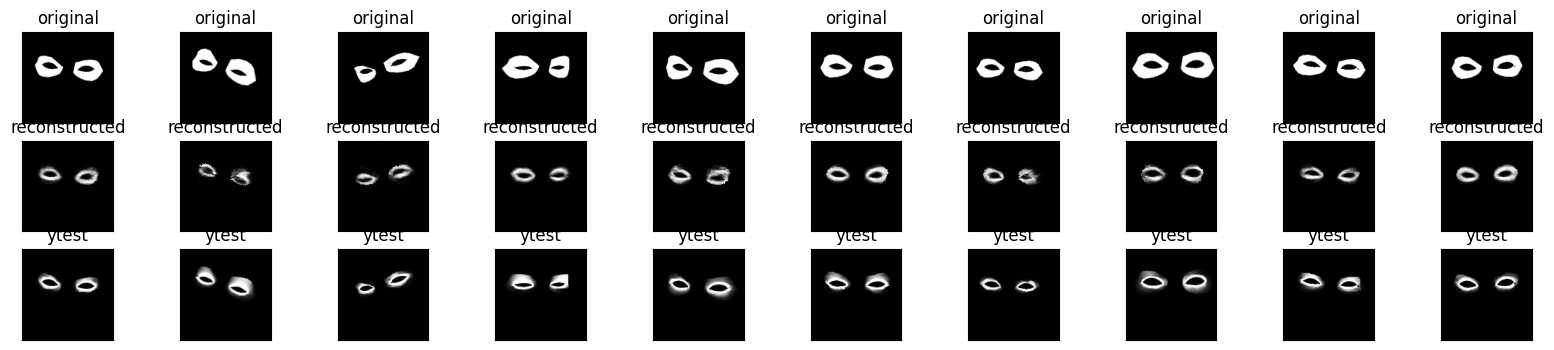

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(y_test[i])
    plt.title("ytest")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Autoencoder with Augmentation

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        img = img.convert('L')  # Ensure the image is in gray format
        img = img.resize((128, 128))  # Resize image to a fixed size
        img_array = np.array(img)
        images.append(img_array)
    return np.array(images)

def augment_with_flip(images):
    augmented_images = []
    for img in images:
        augmented_images.append(img)  # Original image
        augmented_images.append(np.fliplr(img))  # Horizontally flipped
    return np.array(augmented_images)

# Paths to the image directories
xpath = './allblackwhite/'
ypath = './pymatting_outcome_rw'

# Load images
x_images = load_images_from_folder(xpath)
y_images = load_images_from_folder(ypath)
x_images = augment_with_flip(x_images)
y_images = augment_with_flip(y_images)

# Normalize the images
x_images = x_images.astype('float32') / 255.0
y_images = y_images.astype('float32') / 255.0

# Shuffle and split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_images, y_images, test_size=0.5, random_state=42)

# Verify the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

In [ ]:
import time
latent_dim = 256
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(128*128, activation='sigmoid'),
            layers.Reshape((128, 128))
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, y_train,
                epochs=100,
                shuffle=True,
                validation_data=(x_test, y_test))


In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(y_test[i])
    plt.title("ytest")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()